## Importing Packages

In [78]:
%matplotlib inline
import statsmodels.api as sm
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy.stats as scs
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
sns.set()

## Loading the dataset

In [65]:
data= pd.read_csv('../data/AdSmartABdata.csv')

In [19]:
data.shape

(8077, 9)

In [37]:
data.head()

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
0,0008ef63-77a7-448b-bd1e-075f42c55e39,exposed,2020-07-10,8,Generic Smartphone,6,Chrome Mobile,0,0
1,000eabc5-17ce-4137-8efe-44734d914446,exposed,2020-07-07,10,Generic Smartphone,6,Chrome Mobile,0,0
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1
3,00187412-2932-4542-a8ef-3633901c98d9,control,2020-07-03,15,Samsung SM-A705FN,6,Facebook,0,0
4,001a7785-d3fe-4e11-a344-c8735acacc2c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0


## Data Visualization

<AxesSubplot:xlabel='date', ylabel='count'>

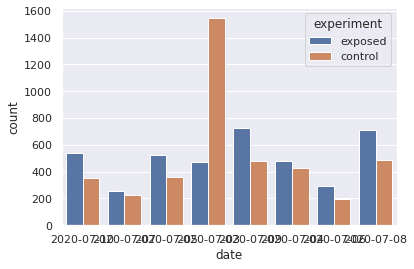

In [21]:
sns.countplot(x="date",hue="experiment", data=data)


### des

<AxesSubplot:>

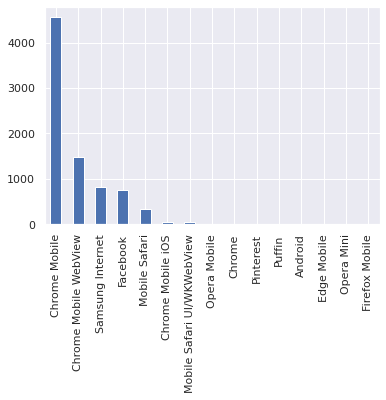

In [22]:
data['browser'].value_counts().plot.bar()

### description

<AxesSubplot:>

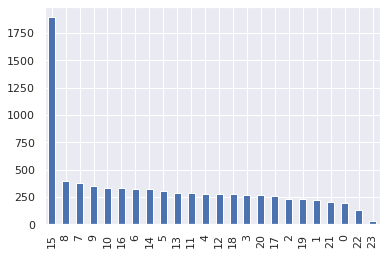

In [23]:
data['hour'].value_counts().plot.bar()

In [58]:
#Calculate the users who responded yes & no for each group
control_yes = len((df[(df['yes']==1) & (df['experiment']== "control" )]).index)
exposed_yes = len((df[(df['yes']==1) & (df['experiment']== "exposed" )]).index)
control_no = len((df[(df['no']==0) & (df['experiment']== "control" )]).index)
exposed_no = len((df[(df['no']==0) & (df['experiment']== "exposed" )]).index)

In [60]:
controlled = len((df[(df['experiment']== "control" )]).index) #total number of controlled users
exposed = len((df[(df['experiment']== "exposed" )]).index) #total number of exposed groups

<AxesSubplot:xlabel='yes', ylabel='count'>

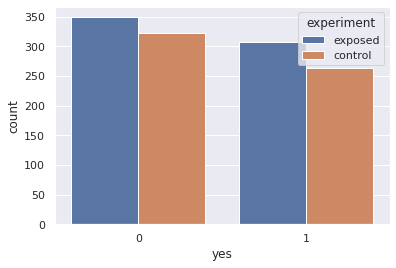

In [62]:
sns.countplot(x="yes",hue="experiment", data=df)

<AxesSubplot:xlabel='no', ylabel='count'>

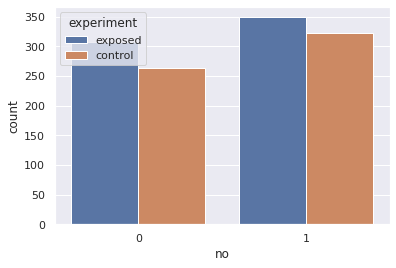

In [63]:
sns.countplot(x="no",hue="experiment", data=df)

## Classical A/B testing

In [67]:
df['aware'] = 0
df.loc[df['yes'] == 1, 'aware'] = 1
df.loc[df['yes'] == 0, 'aware'] = 0
df.drop(columns=['yes', 'no'], inplace=True)
df = df.set_index('auction_id')
df.head(5)

,experiment,date,hour,device_make,platform_os,browser,aware
auction_id,,,,,,,
0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0
008aafdf-deef-4482-8fec-d98e3da054da,exposed,2020-07-04,16,Generic Smartphone,6,Chrome Mobile,1
00a1384a-5118-4d1b-925b-6cdada50318d,exposed,2020-07-06,8,Generic Smartphone,6,Chrome Mobile,0
00b6fadb-10bd-49e3-a778-290da82f7a8d,control,2020-07-08,4,Samsung SM-A202F,6,Facebook,1
00ebf4a8-060f-4b99-93ac-c62724399483,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0


## Calculate conversion rates

In [68]:
summary_df = df.pivot_table(values='aware', index='experiment', aggfunc='sum')
summary_df['total'] = df.pivot_table( values='aware', index='experiment', aggfunc='count')
summary_df['rate'] = df.pivot_table(values='aware', index='experiment')
summary_df['not aware'] = summary_df['total'] - summary_df['aware']
summary_df = summary_df.reindex(['aware', 'not aware', 'total', 'rate'], axis=1)
summary_df

,aware,not aware,total,rate
experiment,,,,
control,264,322,586,0.450512
exposed,308,349,657,0.468798


In [69]:
e_rate = summary_df['rate']['exposed']
c_rate = summary_df['rate']['control']
dif_cr = e_rate - c_rate
dif_cr

0.018285619295484168

## Calculate z-score and p-value.

In [70]:
def z_score_calc(e_rate, c_rate, std_dev_e, std_dev_c):
    return (e_rate - c_rate)/np.sqrt(std_dev_e**2 + std_dev_c**2)

In [71]:
c_count = summary_df['total']['control']
e_count = summary_df['total']['exposed']

In [72]:
std_dev_c = np.sqrt( c_rate * (1 - c_rate) / c_count)
std_dev_e = np.sqrt(e_rate * (1 - e_rate) / e_count)

In [79]:
z_score = z_score_calc(e_rate, c_rate, std_dev_e, std_dev_c)

In [80]:
p_value = scs.norm().sf(z_score)
p_value

0.2591726745827285

In [81]:
scs.norm().sf

<bound method rv_frozen.sf of <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fcc21a9c490>>